In [1]:
import yt
import cPickle
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import brewer2mpl as brew
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from emission_functions import *
import trident

from radial_data_nozeros import *
from astropy.table import Table
from holoviews.operation.datashader import aggregate, datashade, dynspread, shade
from holoviews.operation import decimate
from holoviews.operation import histogram
import pandas as pd
import holoviews as hv

import seaborn as sns
sns.set_style("white", {'axes.grid' : False})

/Users/dalek/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [2]:
def get_refine_box(ds, zsnap, track):
    ## find closest output, modulo not updating before printout
    diff = track['col1'] - zsnap
    this_loc = track[np.where(diff == np.min(diff[np.where(diff > 1.e-6)]))]
    print "using this loc:", this_loc
    x_left = this_loc['col2'][0]
    y_left = this_loc['col3'][0]
    z_left = this_loc['col4'][0]
    x_right = this_loc['col5'][0]
    y_right = this_loc['col6'][0]
    z_right = this_loc['col7'][0]
    refine_box_center = [0.5*(x_left+x_right), 0.5*(y_left+y_right), 0.5*(z_left+z_right)]
    refine_box = ds.r[x_left:x_right, y_left:y_right, z_left:z_right]
    refine_width = np.abs(x_right - x_left)
    return refine_box, refine_box_center, refine_width


In [13]:
baseREF = "/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2"
fnREF = baseREF+"/RD0016/RD0016"
baseNAT = "/Users/dalek/data/Molly/natural/nref11"
fnNAT = baseNAT+"/RD0016/RD0016"

track_name = baseREF+"/halo_track"
track = Table.read(track_name, format='ascii')
track.sort('col1')

In [14]:
dsREF = yt.load(fnREF)
dsNAT = yt.load(fnNAT)

trident.add_ion_fields(dsREF,ions=['Si III','O VI'])
trident.add_ion_fields(dsNAT,ions=['Si III','O VI'])

rbR,rb_centerR,rb_widthR = get_refine_box(dsREF,dsREF.current_redshift,track)
rbN,rb_centerN,rb_widthN = get_refine_box(dsNAT,dsNAT.current_redshift,track)

yt : [INFO     ] 2018-03-16 13:53:10,280 Parameters: current_time              = 101.408837975
yt : [INFO     ] 2018-03-16 13:53:10,282 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-03-16 13:53:10,283 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-03-16 13:53:10,284 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-03-16 13:53:10,286 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-03-16 13:53:10,288 Parameters: current_redshift          = 2.99999975405
yt : [INFO     ] 2018-03-16 13:53:10,289 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-03-16 13:53:10,290 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-03-16 13:53:10,293 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-03-16 13:53:10,335 Parameters: current_time              = 101.408837971
yt : [INFO     ] 2018-03-16 13:53:10,336 Parameters: domain_dimensions         = [256 

using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
3.04999996364 0.494074 0.490963 0.500097 0.496074 0.492963 0.502097   10
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
3.04999996364 0.494074 0.490963 0.500097 0.496074 0.492963 0.502097   10


### Consistency.py  colormaps!

In [5]:
h1_color_map = sns.blend_palette(("white","#ababab","#565656","black","#4575b4","#984ea3","#d73027","darkorange","#ffe34d"), as_cmap=True)
h1_proj_min = 11
h1_proj_max = 21


o6_color_map = sns.blend_palette(("white","black","#4daf4a","#4575b4","#984ea3","#d73027","darkorange"), as_cmap=True)
o6_min = 11
o6_max = 15

si3_color_map = "magma"
si3_min = 11
si3_max = 16

In [ ]:
HIN = yt.ProjectionPlot(dsNAT,'x','H_number_density',center=rb_centerN,data_source=rbN,
                              width=(rb_widthN,'code_length'))
HIN.set_zlim('H_number_density',10**18,10**24)
frbHN = np.log10(HIN.frb['H_number_density'])

im = plt.imshow(frbHN,vmin=h1_proj_min,vmax=h1_proj_max,interpolation='none',cmap=h1_color_map,origin='lower')
im.axes.set_xticks([])
im.axes.set_yticks([])
plt.show()

yt : [INFO     ] 2018-03-16 13:53:17,741 Projection completed
yt : [INFO     ] 2018-03-16 13:53:17,744 xlim = 0.490963 0.492963
yt : [INFO     ] 2018-03-16 13:53:17,748 ylim = 0.500097 0.502097
yt : [INFO     ] 2018-03-16 13:53:17,752 xlim = 0.490963 0.492963
yt : [INFO     ] 2018-03-16 13:53:17,753 ylim = 0.500097 0.502097
yt : [INFO     ] 2018-03-16 13:53:17,761 Making a fixed resolution buffer of (('gas', 'Si_p2_number_density')) 800 by 800
yt : [INFO     ] 2018-03-16 13:53:18,400 Making a fixed resolution buffer of (Si_p2_number_density) 800 by 800
/Users/dalek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


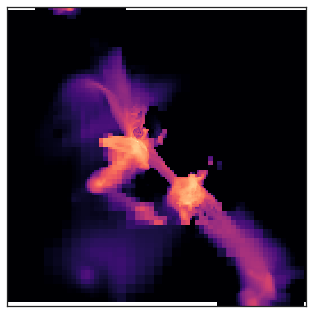

In [15]:
SIIIN = yt.ProjectionPlot(dsNAT,'x','Si_p2_number_density',center=rb_centerN,data_source=rbN,
                              width=(rb_widthN,'code_length'))
#SIIN.set_zlim('H_number_density',10**18,10**24)
frbSN = np.log10(SIIIN.frb['Si_p2_number_density'])

im = plt.imshow(frbSN,vmin=si3_min,vmax=si3_max,interpolation='none',cmap=si3_color_map,origin='lower')
im.axes.set_xticks([])
im.axes.set_yticks([])
plt.show()

In [ ]:
make_fig = True

In [ ]:
## Let's 
if make_fig == True:
    print 'HI REF'
    HIR = yt.ProjectionPlot(dsREF,'x','H_number_density',center=rb_centerR,data_source=rbR,
                              width=(rb_widthR,'code_length'))
    HIR.set_zlim('H_number_density',10**h1_proj_min,10**h1_proj_max)
    frbHR = np.log10(HIR.frb['H_number_density'])

    print 'SiIII REF'
    SiIIIR = yt.ProjectionPlot(dsREF,'x','Si_p2_number_density',center=rb_centerR,data_source=rbR,
                              width=(rb_widthR,'code_length'))
    SiIIIR.set_zlim('Si_p2_number_density',10**si3_min,10**si3_max)
    frbSR = np.log10(SiIIIR.frb['Si_p2_number_density'])

    print 'OVI REF'
    OVIR = yt.ProjectionPlot(dsREF,'x','O_p5_number_density',center=rb_centerR,data_source=rbR,
                               width=(rb_widthR,'code_length'))
    OVIR.set_zlim('O_p5_number_density',10**o6_min,10**o6_max)
    frbOR = np.log10(OVIR.frb['O_p5_number_density'])

    print 'HI NAT'
    HIN = yt.ProjectionPlot(dsNAT,'x','H_number_density',center=rb_centerN,data_source=rbN,
                              width=(rb_widthN,'code_length'))
    HIN.set_zlim('H_number_density',10**h1_proj_min,10**h1_proj_max)
    frbHN = np.log10(HIN.frb['H_number_density'])

    print 'SiIII NAT' 
    SiIIIN = yt.ProjectionPlot(dsNAT,'x','Si_p2_number_density',center=rb_centerN,data_source=rbN,
                              width=(rb_widthN,'code_length'))
    SiIIIN.set_zlim('Si_p2_number_density',10**si3_min,10**si3_max)
    frbSN = np.log10(SiIIIN.frb['Si_p2_number_density'])

    print 'OVI NAT'
    OVIN = yt.ProjectionPlot(dsNAT,'x','O_p5_number_density',center=rb_centerN,data_source=rbN,
                               width=(rb_widthN,'code_length'))
    OVIN.set_zlim('O_p5_number_density',10**o6_min,10**o6_max)
    frbON = np.log10(OVIN.frb['O_p5_number_density'])
    

#### This was me trying a post-processing trick to get rid of the white portions of projections
but the where function is tricky with the 2D arrays. So I just went into trident and got rid of the lines where the zero things out for who knows what reason. Hoping that fixes it!

In [ ]:
SiIIIN = yt.ProjectionPlot(dsNAT,'x','Si_p2_number_density',center=rb_centerN,data_source=rbN,
                              width=(rb_widthN,'code_length'))
SiIIIN.set_zlim('Si_p2_number_density',10**si3_min,10**si3_max)
idx = np.where(SiIIIN.frb['Si_p2_number_density'] == 0)[0]
frbSN = np.log10(SiIIIN.frb['Si_p2_number_density'])
frbSN2 = np.log10(SiIIIN.frb['Si_p2_number_density'])
frbSN2[idx] = si3_min

#### back to plot making!

In [ ]:
if make_fig == True:
    fig,ax = plt.subplots(2,3)#,sharex=True,sharey=True)
    fig.set_size_inches(20,12)

    ### HI Ref ###
    print 'HI REF'
    im = ax[0,0].imshow(frbHR,vmin=h1_proj_min,vmax=h1_proj_max,interpolation='none',cmap=h1_color_map,origin='lower')
    im.axes.set_xticks([])
    im.axes.set_yticks([])
    ax[0,0].text(0.95, 0.95, 'HI',
                verticalalignment='top', horizontalalignment='right',fontweight='bold',
                transform=ax[0,0].transAxes,color='SlateBlue', fontsize=30)

    ### SiIII Ref ###
    print 'SiIII REF'
    im2 = ax[0,1].imshow(frbSR,vmin=si3_min,vmax=si3_max,interpolation='none',cmap=si3_color_map,origin='lower')
    im2.axes.set_xticks([])
    im2.axes.set_yticks([])
    ax[0,1].text(0.95, 0.95, 'SiIII',
                verticalalignment='top', horizontalalignment='right',fontweight='bold',
                transform=ax[0,1].transAxes,color='DodgerBlue', fontsize=30)

    ### OVI Ref ###
    print 'OVI REF'
    im3 = ax[0,2].imshow(frbOR,vmin=o6_min,vmax=o6_max,interpolation='none',cmap=o6_color_map,origin='lower')
    im3.axes.set_xticks([])
    im3.axes.set_yticks([])
    ax[0,2].text(0.95, 0.95, 'OVI',
                verticalalignment='top', horizontalalignment='right',fontweight='bold',
                transform=ax[0,2].transAxes,color='DeepPink', fontsize=30)

    ## HI  Nat ###
    #val,pos = dsNAT.find_max('dark_matter_density')
    print 'HI NAT'
    im = ax[1,0].imshow(frbHN,vmin=h1_proj_min,vmax=h1_proj_max,interpolation='none',cmap=h1_color_map,origin='lower')
    im.axes.set_xticks([])
    im.axes.set_yticks([])


    ## SiIII Nat ###
    print 'SiIII NAT'
    im2 = ax[1,1].imshow(frbSN,vmin=si3_min,vmax=si3_max,interpolation='none',cmap=si3_color_map,origin='lower')
    im2.axes.set_xticks([])
    im2.axes.set_yticks([])

    ### OVI Nat ###
    print 'OVI NAT'
    im3 = ax[1,2].imshow(frbON,vmin=o6_min,vmax=o6_max,interpolation='none',cmap=o6_color_map,origin='lower')
    im3.axes.set_xticks([])
    im3.axes.set_yticks([])

    ## Reformat ##
    plt.tight_layout()
    fig.subplots_adjust(bottom=0.065)

    ## Colorbars ##
    print 'COLORBARS'
    cbaxes = fig.add_axes([0.0408, 0.03, 0.273, 0.02])
    cb = plt.colorbar(im, cax = cbaxes,orientation='horizontal')
    axcb = cb.ax
    text = axcb.yaxis.label
    font = mpl.font_manager.FontProperties(family='Osaka', size=20)
    text.set_font_properties(font)

    cbaxes2 = fig.add_axes([0.363, 0.03, 0.273, 0.02])
    cb2 = plt.colorbar(im2, cax = cbaxes2,orientation='horizontal')
    axcb = cb2.ax
    text = axcb.yaxis.label
    font = mpl.font_manager.FontProperties(family='Osaka', size=20)
    text.set_font_properties(font)

    cbaxes3 = fig.add_axes([0.689, 0.03, 0.273, 0.02])
    cb3 = plt.colorbar(im3, cax = cbaxes3,orientation='horizontal')
    axcb = cb3.ax
    text = axcb.yaxis.label
    font = mpl.font_manager.FontProperties(family='Osaka', size=20)
    text.set_font_properties(font)

plt.show()

In [ ]:
np.min(SiIIIR.frb['Si_p2_number_density'])

In [ ]:
plt.imshow(np.log10(SiIIIN.frb['Si_p2_number_density']),vmax=2)
plt.colorbar()
plt.show()

In [ ]:
frbSN.min()

In [ ]:
id2 = np.where(frbSN == -float('Inf'))[0]
print len(id2),len(idx)
print len(frbSN)

In [ ]:
rbR['Si_p2_number_density'].min()